In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import stan

try:
    import arviz as az
except ImportError as err:
    print("Please, install arviz for easy visualization of Stan models.")

import nest_asyncio
nest_asyncio.apply()

<Axes: ylabel='Count'>

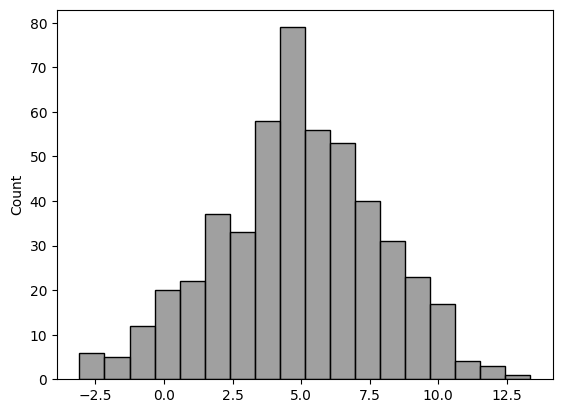

In [23]:
### Simulate data
mu_0 = 5
sigma_0 = 3
sigma_2 = 9
N = 500
pre_mu = np.random.normal(mu_0, sigma_0, size=N)
y = np.random.normal(pre_mu, sigma_2)

sns.histplot(pre_mu, color='gray')

In [24]:
### Create data dictionary
data_dict = {
    'y': y,
    'N': N
}

In [ ]:
program_code = """

data {
    int<lower=1> N;
    vector[N] y;
}

parameters {
    real mu;
}

model {
    // Priors
    mu ~ normal(5, 3);          // mu_0 = 5, sigma_0 = 3

    // Data model (likelihood)
    for (n in 1:N) {
        y[n] ~ normal(mu, 9);
    }
}

"""

In [26]:
model = stan.build(program_code, data=data_dict)

Building...



Building: found in cache, done.

In [27]:
fit = model.sample(num_chains=4, num_samples=1000, num_warmup=500)

Sampling:   0%
Sampling:  25% (1500/6000)
Sampling:  50% (3000/6000)
Sampling:  75% (4500/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.000171 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000145 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000146 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.46 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000146 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.46 seconds.
  Adjust your expectations accordingly!


In [28]:
### Explore raw model outouts
results_df = fit.to_frame()

results_df.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu
draws,,,,,,,,
0,-261.229691,0.562091,1.130117,1.0,3.0,0.0,263.775942,5.377313
1,-261.199948,0.893215,0.824838,2.0,3.0,0.0,262.122722,5.258181
2,-261.241290,1.000000,0.992212,1.0,1.0,0.0,261.264691,5.161606
3,-261.198805,0.997287,1.374057,2.0,3.0,0.0,261.228442,5.283473
4,-261.468169,0.925128,1.130117,1.0,3.0,0.0,261.674335,4.985169


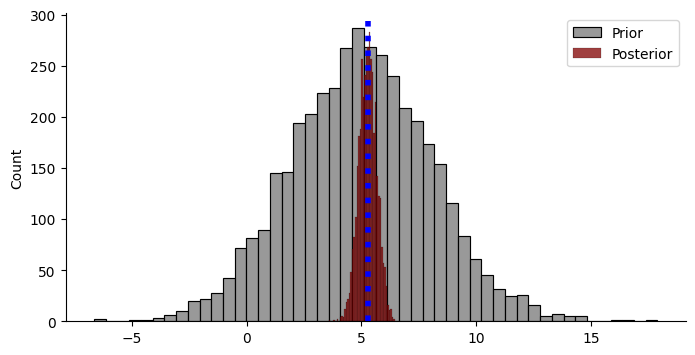

In [29]:
prior_samples = np.random.normal(mu_0, sigma_0, size=4000)
post_samples = results_df.mu.values
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.histplot(prior_samples, color='gray', ax=ax, alpha=0.8, label="Prior")
sns.histplot(post_samples, color='maroon', ax=ax, label="Posterior")
ax.axvline(np.mean(post_samples), color='blue', linestyle='dotted', lw=4)
sns.despine()
ax.legend()